### #3

Kaggle competition: [\[link\]](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

Entry by Robin P.M. Kras

In [28]:
import pandas as pd

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Problem Understanding

The problem is described as predicting the price of houses dependent on linear features. Hence, we will use linear regression.

### Data Exploration

In [30]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We are dealing with a significant amount of numerical features together with a few categorical features. We will have to encode the categorical features later in order to make linear regression work properly.

In [31]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
print(f'The shape of the train set is: ', train.shape)
print(f'The shape of the test set is:  ', test.shape)

The shape of the train set is:  (1460, 81)
The shape of the test set is:   (1459, 80)


([<matplotlib.patches.Wedge at 0x201e0bb2090>,
 [Text(-1.099908325751476, 0.014201230319421778, 'Pave'),
  Text(1.0999083269772107, -0.014201135383951041, 'Grvl')])

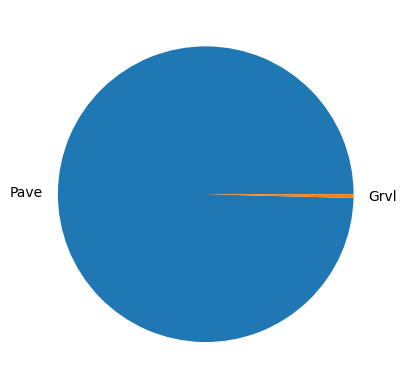

In [33]:
import matplotlib.pyplot as plt

street = train['Street'].value_counts()

fig, ax = plt.subplots()
ax.pie(street, labels=street.index)

Wow! There are incredibly few houses located on Grvl, and a TON of houses are on Pave. How can we proceed while knowing this?

In addition, there are a few extra features that are very relevant to the location of the house. Let us explore these too.

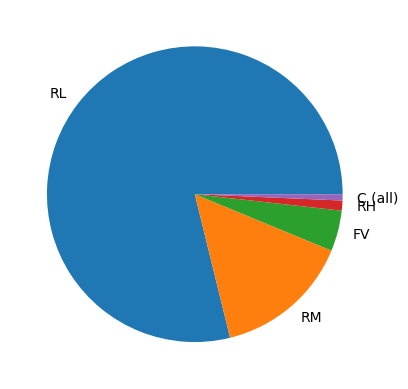

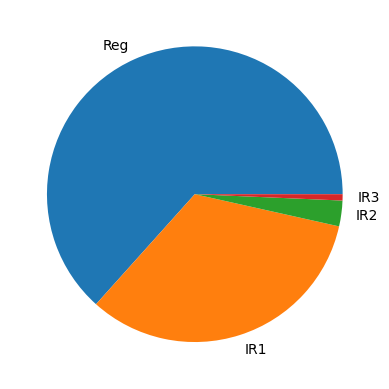

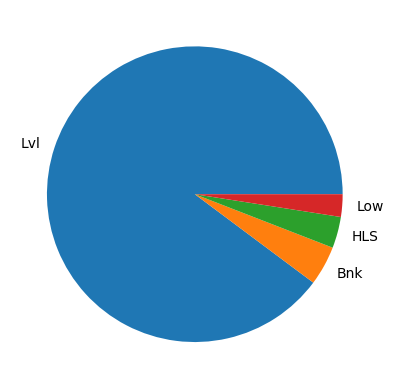

In [34]:
expanding = ['MSZoning', 'LotShape', 'LandContour']

for i in expanding:
    feature = train[i].value_counts()

    fig, ax = plt.subplots()
    ax.pie(feature, labels=feature.index)

Without taking an in-depth look of the data itself, it has become quite apparent that we are dealing with an imbalanced dataset. Considering computational power limitations, it will be quite the challenge to reduce this imbalance on my own machine. Therefore, it will be more realistic for me right now to keep the dataset in its current state, imbalanced.

In [35]:
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### Data Preprocessing

Let us check whether we are dealing with missing values.

In [36]:
print(f"Train set, null count: \n{train.isnull().sum()}")
print("\n")
print(f"Test set, null count: \n{test.isnull().sum()}")

Train set, null count: 
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Test set, null count: 
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


Since most values are inherently numeric over categoric, we will take the mean to account for missing values. If there is data missing that is categoric, however, we will use the median.

In [37]:
# A simple function to handle this:

def impute_values(dataframe):
    for col in dataframe.columns[dataframe.isnull().any()]:
        if dataframe[col].dtype == 'O':  
            dataframe[col].fillna(0)
        else:  
            dataframe[col].fillna(dataframe[col].median(), inplace=True)
    
    return dataframe

In [38]:
train = impute_values(train)
test = impute_values(test)

C:\Users\robkr\AppData\Local\Temp\ipykernel_10536\1998703405.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].fillna(dataframe[col].median(), inplace=True)
C:\Users\robkr\AppData\Local\Temp\ipykernel_10536\1998703405.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [39]:
print(f"Train set, null count: \n{train.isnull().sum()}")
print("\n")
print(f"Test set, null count: \n{test.isnull().sum()}")

Train set, null count: 
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


Test set, null count: 
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


Perfect! Now that we handled all missing values in a very naive manner, it is time to continue.

Considering the large amount of features, I advise against applying feature engineering, since the chance of overfitting will likely be very low already.

In [40]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In order to encode all categorical variables for training, I will use the sklearn label encoder.

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def encode_dataframes(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'O':  
            dataframe[col] = le.fit_transform(dataframe[col])
        else:  
            continue
    
    return dataframe

train = encode_dataframes(train)
test = encode_dataframes(test)

In [42]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


Terrific! It seems to have worked just fine.

### Model Selection

To humor the description of the competition, I will use Linear Regression to predict the house prices.

In [43]:
from sklearn.linear_model import LinearRegression

X = train.drop(columns=['Id','SalePrice'])
y = train['SalePrice']  

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # A default test size of 0.2

In [45]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_val)

In [47]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_error

# Compute regression metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 1194210396.7414384
Mean Absolute Error (MAE): 21562.847497684765
R² Score: 0.844307743310518


In [48]:
rms = root_mean_squared_error(y_val, y_pred)
print(f"RMSE Score: {rms}")

RMSE Score: 34557.349388247916


In [49]:
X_test = test.drop(columns=['Id'])  

test_predictions = model.predict(X_test)  

submission_df = pd.DataFrame({
    'Id': test['Id'],  
    'SalePrice': test_predictions  
})

submission_df['SalePrice'] = submission_df['SalePrice'].astype(float)

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

Retry using XGBoost over LinearRegression

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 653129201.3029033
Mean Absolute Error: 16080.148049550513
R² Score: 0.9148498773574829


In [51]:
rms = root_mean_squared_error(y_test, y_pred)

In [52]:
print(f"RMSE Score: {rms}")

RMSE Score: 25556.39257217073


The performance is significantly better now, with a 25% lower MSE. So, the average prediction is off by 16.000$. 

In [53]:
X_test = test.drop(columns=['Id'])  

predictions = model.predict(X_test)  

output = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
output.to_csv('submission_xgboost.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


A final score of 0.14138, not bad, but could be better.